# Iris dataset and SVM
This Notebook serve as a starting base for the analysis of the Iris dataset and the utilization of the SVM model on said dataset.

### Iris Dataset

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
import matplotlib.pyplot as plt
import numpy as np

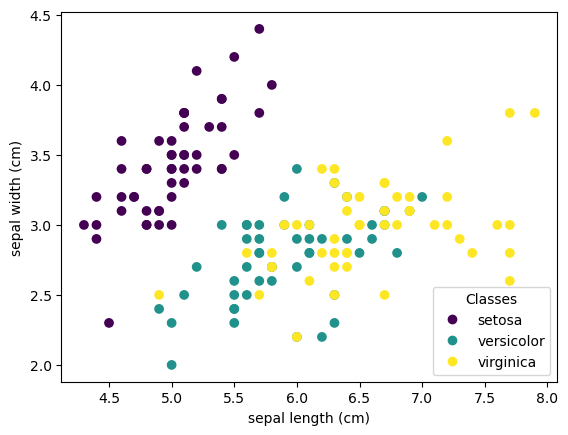

In [ ]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

Utilization of two classes that are linarly separable

In [ ]:
# remove virginica class
X = iris.data[iris.target != 2]
X = X[:, :2]  # only 2 features
# 1 if class is virginica, 0 if class is setosa
y = iris.target[iris.target != 2]

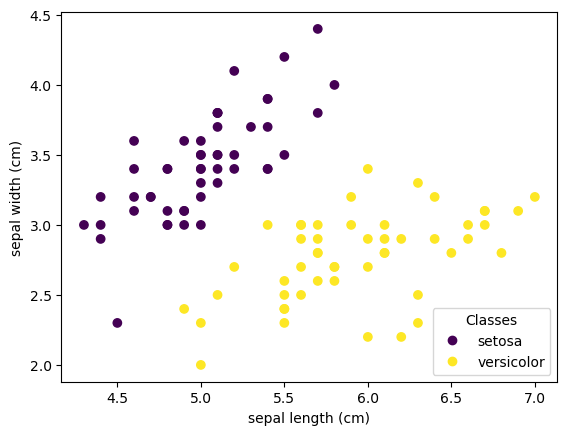

In [ ]:
_, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names[0:2], loc="lower right", title="Classes"
)

### SVM

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1e10)
clf.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

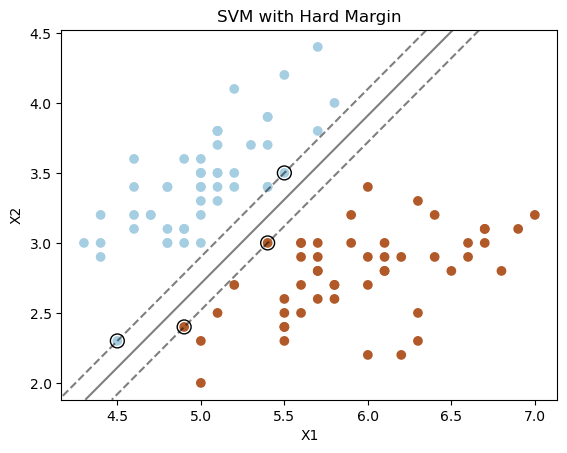

In [ ]:
# Get support vectors
support_vectors = clf.support_vectors_

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.title('SVM with Hard Margin')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


The line is: $w_1 \cdot x_1 + w_2 \cdot x_2 + b = 0$ so to represent the line in the plane $x_2-x_1$ we have $x_2 = -\frac{w_1}{w_2} \cdot x_1 - \frac{b}{w_2}$

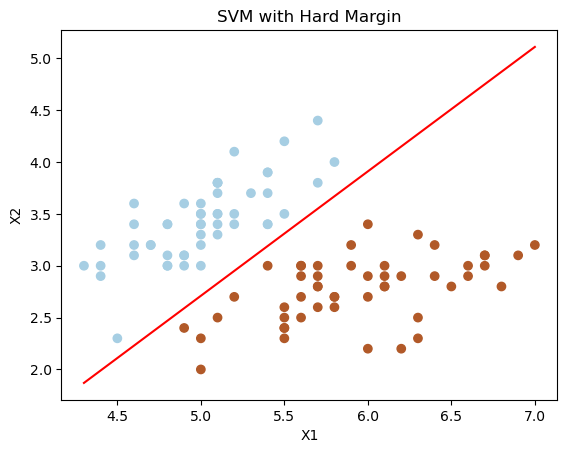

In [ ]:
w = clf.coef_[0]  # Coefficients of the features in the decision function
b = clf.intercept_[0]  # Constants in decision function

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')

# Plot the decision boundary
x_plot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_plot = (-w[0] / w[1]) * x_plot - b / w[1]
plt.plot(x_plot, y_plot, color='r', linestyle='-')

plt.title('SVM with Hard Margin')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()